In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
#pd.set_option('max_columns', 200)

In [2]:
df = pd.read_csv('coaster_db.csv')

In [ ]:
df.shape
df.head(5)

In [ ]:
df.columns

In [ ]:
df.dtypes

In [ ]:
df.describe()

Data preparation

In [3]:
df = df[['coaster_name', 
       #'Manufacturer', 
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 
       'speed_mph', 'height_ft',

       'Inversions_clean', 'Gforce_clean', 'Location', 'Status']]

#df = df.drop(['Manufacturer'], axis=1)

df.dtypes

coaster_name           object
year_introduced         int64
latitude              float64
longitude             float64
Type_Main              object
opening_date_clean     object
speed_mph             float64
height_ft             float64
Inversions_clean        int64
Gforce_clean          float64
Location               object
Status                 object
dtype: object

In [4]:
df['opening_date_clean'] = pd.to_datetime(df['opening_date_clean']) #pd.to_numeric
df.dtypes

coaster_name                  object
year_introduced                int64
latitude                     float64
longitude                    float64
Type_Main                     object
opening_date_clean    datetime64[ns]
speed_mph                    float64
height_ft                    float64
Inversions_clean               int64
Gforce_clean                 float64
Location                      object
Status                        object
dtype: object

In [5]:
df = df.rename(columns={'coaster_name':'Coaster_name',
                        'year_introduced':'Year_Introduced', 
                        'opening_date_clean':'Opening_Date',
                        'speed_mph':'Speed', 
                        'height_ft':'Height', 
                        'Inversions_clean':'Inversions', 
                        'Gforce_clean':'Gforce'}).copy()

In [6]:
df.isna().sum()
df.loc[df.duplicated('Coaster_name')].head()

,Coaster_name,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,Speed,Height,Inversions,Gforce,Location,Status
43,Crystal Beach Cyclone,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0,Crystal Beach Park,Removed
60,Derby Racer,1937,42.4200,-70.9860,Wood,1911-01-01,NaN,NaN,0,NaN,Revere Beach,Removed
61,Blue Streak (Conneaut Lake),1938,41.6349,-80.3180,Wood,1938-05-23,50.0,NaN,0,NaN,Conneaut Lake Park,Closed
167,Big Thunder Mountain Railroad,1980,NaN,NaN,Steel,NaT,35.0,NaN,0,NaN,Other,NaN
237,Thunder Run (Canada's Wonderland),1986,43.8427,-79.5423,Steel,1981-05-23,39.8,32.8,0,NaN,Canada's Wonderland,Operating


In [7]:
df.query('Coaster_name == "Crystal Beach Cyclone"')

,Coaster_name,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,Speed,Height,Inversions,Gforce,Location,Status
39,Crystal Beach Cyclone,1926,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0,Crystal Beach Park,Removed
43,Crystal Beach Cyclone,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0,Crystal Beach Park,Removed


In [8]:
df = df.loc[~df.duplicated(subset=['Coaster_name','Location',
                                   'Opening_Date'])] \
                                .reset_index(drop=True)

Feature Understanding

Text(0, 0.5, 'Count')

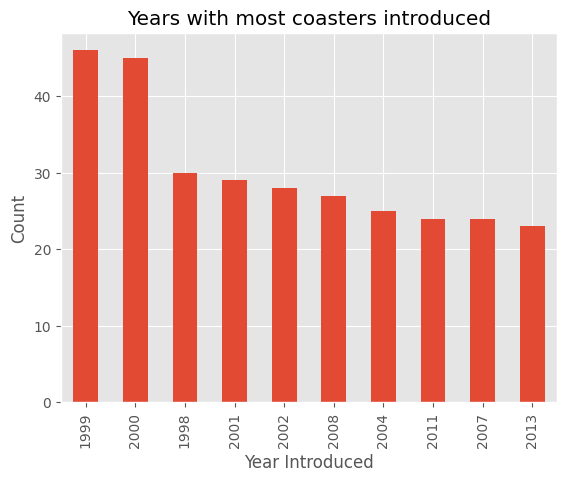

In [9]:
ax = df['Year_Introduced'].value_counts() \
    .head(10) \
    .plot(kind='bar', 
          title='Years with most coasters introduced');

ax.set_xlabel('Year Introduced')
ax.set_ylabel('Count')

Text(0, 0.5, 'Count')

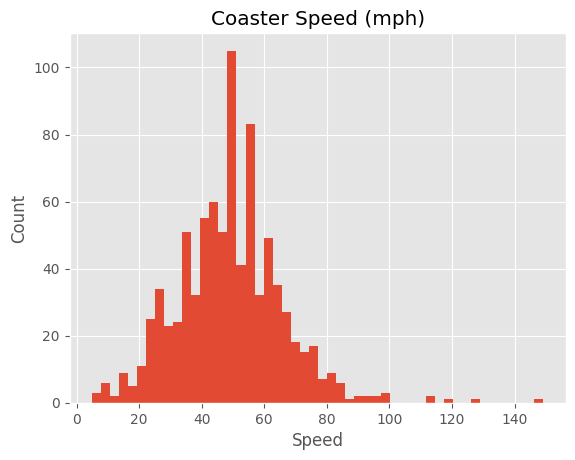

In [10]:
ax = df['Speed'].plot(kind='hist',
                    bins=50,
                    title = 'Coaster Speed (mph)')    
ax.set_xlabel('Speed')
ax.set_ylabel('Count')

Text(0, 0.5, 'Count')

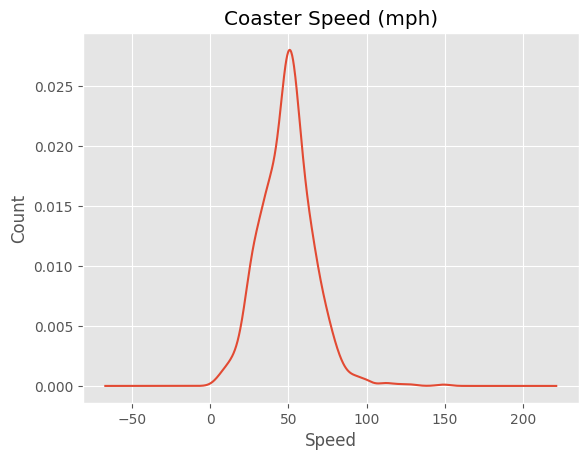

In [11]:
ax = df['Speed'].plot(kind='kde',
                    title = 'Coaster Speed (mph)')    
ax.set_xlabel('Speed')
ax.set_ylabel('Count')

Feature Relationship

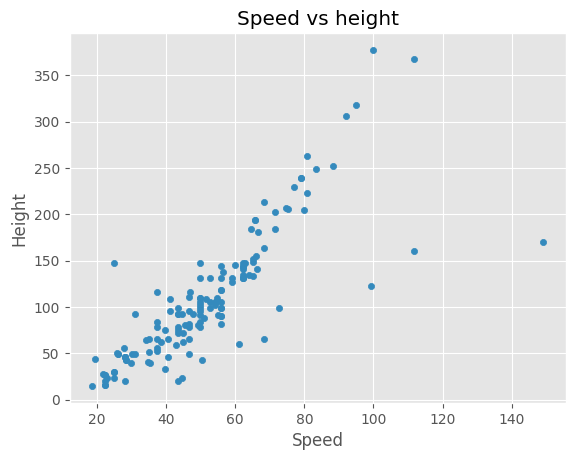

In [12]:
df.plot(kind='scatter',
        x='Speed',
        y='Height',
        title='Speed vs height');

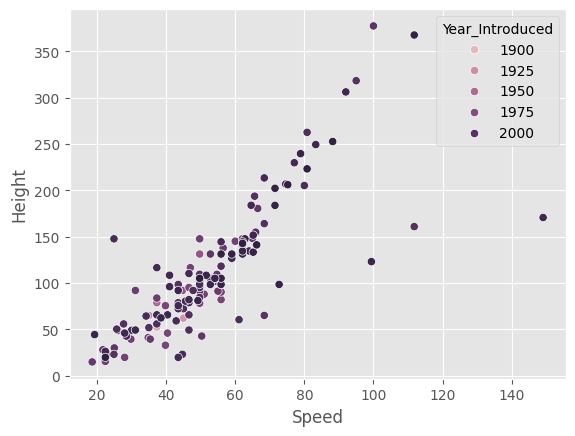

In [13]:
sns.scatterplot(x='Speed',
                y='Height',
                hue='Year_Introduced',
                data = df);

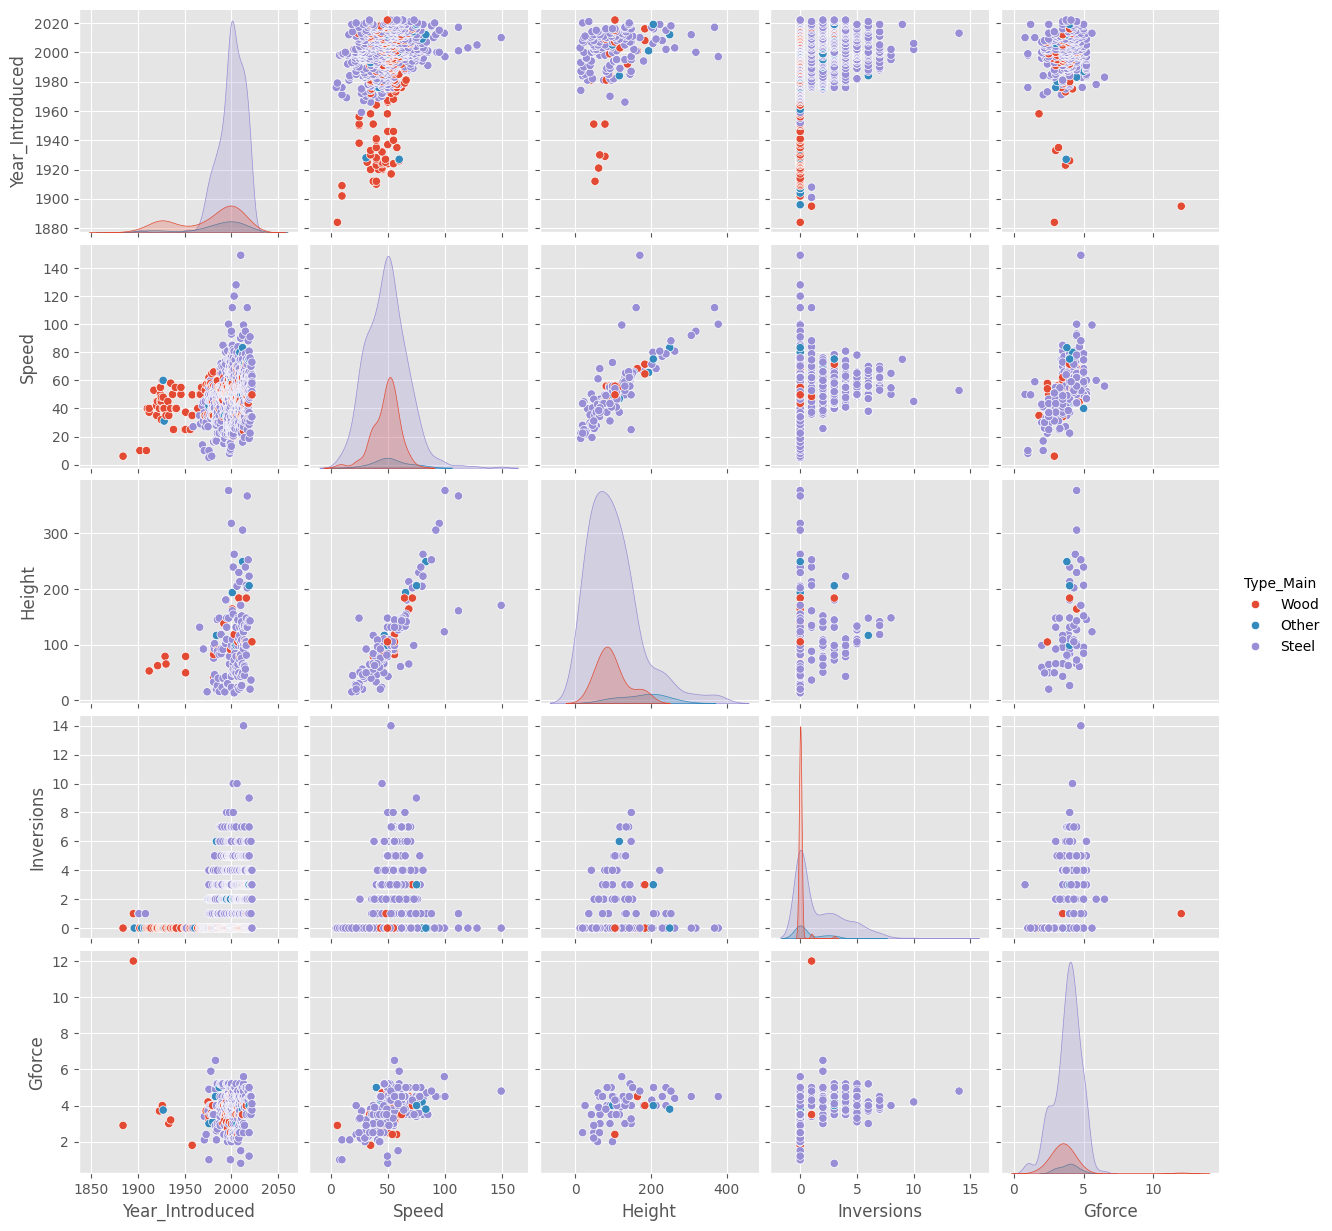

In [14]:
sns.pairplot(df,
            kind='scatter',
            vars=['Year_Introduced','Speed','Height','Inversions','Gforce'],
            hue='Type_Main');

<Axes: >

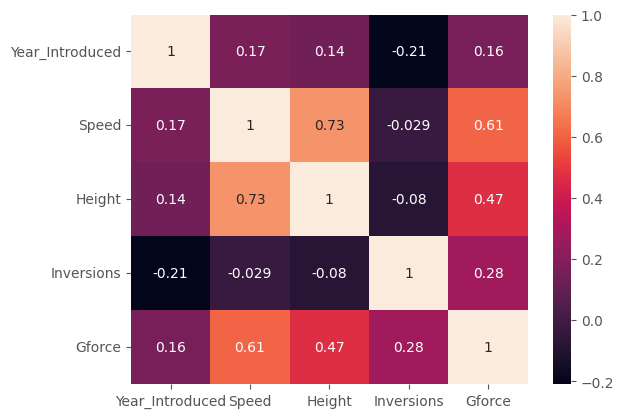

In [15]:
df_corr = df[['Year_Introduced','Speed','Height','Inversions','Gforce']].dropna().corr()

sns.heatmap(df_corr, annot=True)

Ask a question: what location has the fastest coasters

''

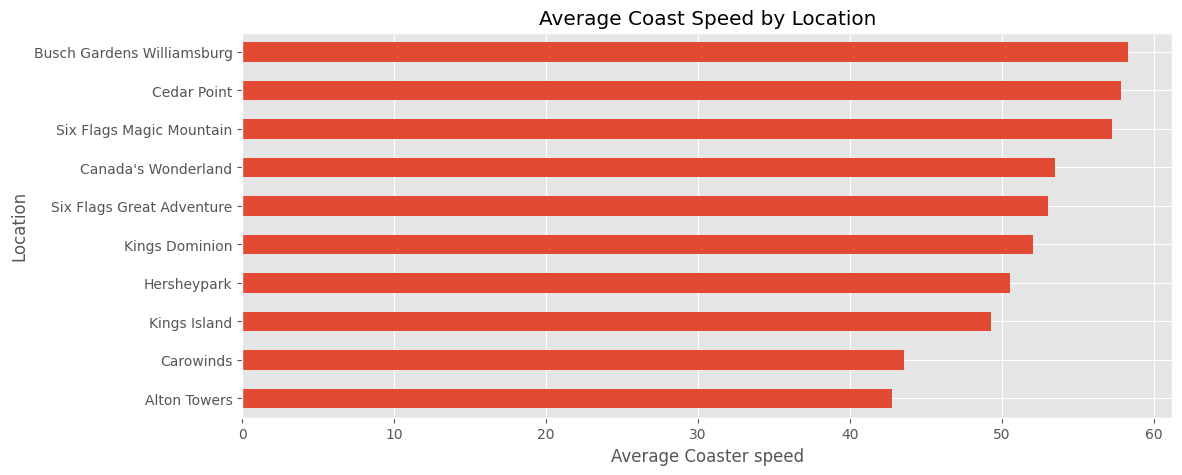

In [16]:
ax = df.query('Location != "Other"') \
    .groupby('Location')['Speed'] \
    .agg(['mean','count']) \
    .query('count >= 10') \
    .sort_values('mean')['mean'] \
    .plot(kind='barh', figsize=(12,5), title='Average Coast Speed by Location')

ax.set_xlabel('Average Coaster speed')
;